In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

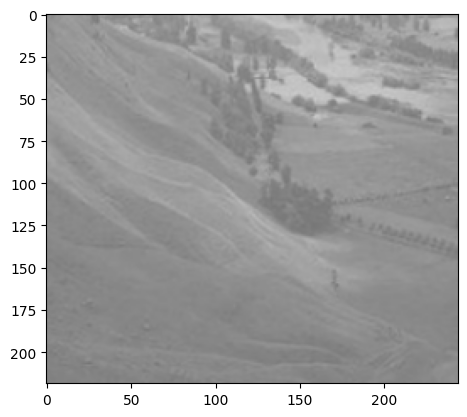

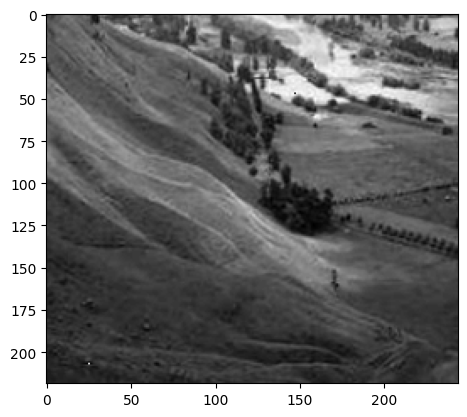

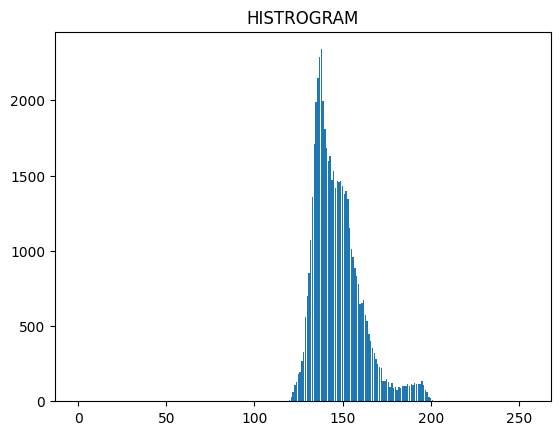

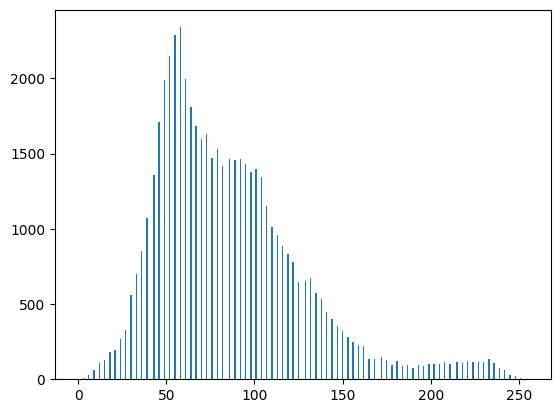

pixel value max ได้แก่: 2339 ที่แถบสี 138
xmin = 119 xmax = 202


In [34]:
def xnew(xmin,xmax,xinput):
    xnew = (xinput-xmin)/(xmax-xmin)*255
    return xnew


bgr = cv2.imread("image/testminmax.png",0) #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
h = rgb.shape[0]
w = rgb.shape[1]

Y = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y[rgb[i][j][0]] +=1


check = 0
checkrate = rgb.size/100*3
for i in range(256):
    check = check + Y[i]
    # print(check)
    if check > 1:
        xmin = i
        break
check = 0
for i in range(255, -1, -1):
    check = check + Y[i]
    # print(check)
    if check > 1:
        xmax = i
        break

img_out = np.full((h,w,3),0,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        img_out[i][j][0:3] = xnew(xmin,xmax,rgb[i][j][0])

Y2 = np.full(256,0,dtype=int) # array 256 ที่มี0เริ่มต้น type = int
for i in range(h):
    for j in range(w):
        # print(rgb[i][j][0])
        Y2[img_out[i][j][0]] +=1

plt.imshow(rgb)
plt.show()
plt.imshow(img_out)
plt.show()
plt.bar(range(256),Y)
plt.title("HISTROGRAM")
plt.show()
plt.bar(range(256),Y2)
plt.show()

maxx = np.max(Y)
index = np.argmax(Y)
print(f"pixel value max ได้แก่: {maxx} ที่แถบสี {index}")
print(f"xmin = {xmin} xmax = {xmax}")

244


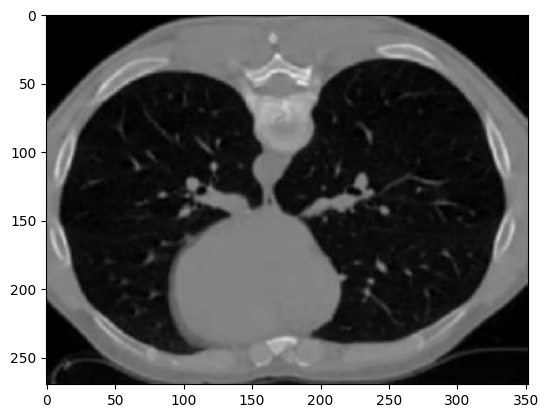

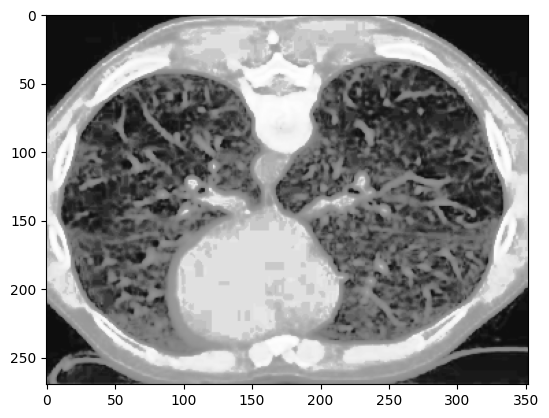

In [95]:

bgr = cv2.imread("image/testeq.png",0) #ภาพBGR
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
h = rgb.shape[0]
w = rgb.shape[1]

N = np.full(256,0,dtype=int)
for i in range(h):
    for j in range(w):
        N[rgb[i][j][0]] +=1


sumN = 0 
size = h*w
Fg = np.full(256,0,dtype=int) 
for i in range(256):
    sumN = sumN + N[i]
    
    Fg[i] = max(0,round((255*(sumN/size)))-1)
    
print(Fg[150])

img_out = np.full((h,w,3),0,dtype=np.uint8)
for i in range(h):
    for j in range(w):
        x = rgb[i][j][0] 
        img_out[i][j][0:3] = Fg[x]

plt.imshow(rgb)
plt.show()
plt.imshow(img_out)
plt.show()


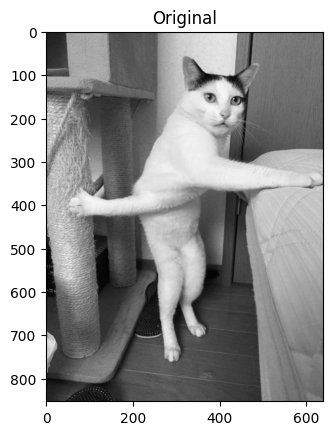

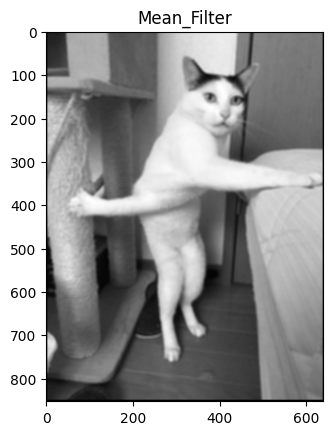

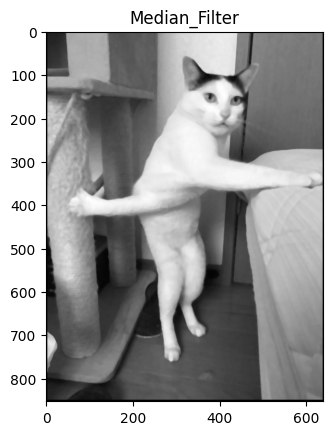

In [112]:
def Mean_Filter(img, mask): #ยังไม่ได้ทำ padding
    h = img.shape[0]
    w = img.shape[1]
    
    h_mask = len(mask[0])
    w_mask = len(mask[1])

    mean= np.zeros((h,w), dtype=np.uint8)
    constant_H = (h_mask - 1) // 2
    constant_W = (w_mask - 1) // 2
    for i in range(constant_H, h-constant_H):
        for j in range(constant_W,w-constant_W):
            temp= img[i-constant_H:i+constant_H+1, j-constant_W:j+constant_W+1]
            product= temp*mask
            mean[i,j]= np.sum(product)/(h_mask*w_mask)
    return mean

def Median_Filter(img, mask): #ยังไม่ได้ทำ padding
    h = img.shape[0]
    w = img.shape[1]
    
    h_mask = len(mask[0])
    w_mask = len(mask[1])

    median= np.zeros((h,w), dtype=np.uint8)
    constant_H = (h_mask - 1) // 2
    constant_W = (w_mask - 1) // 2
    for i in range(constant_H, h-constant_H):
        for j in range(constant_W,w-constant_W):
            temp= img[i-constant_H:i+constant_H+1, j-constant_W:j+constant_W+1]
            product= temp*mask
            median[i,j]= np.median(product)
    return median

size=7
mask= np.ones((size,size), dtype=np.uint8)

img = cv2.imread("image/cat.jpg",0) #ภาพBGR

test_mean = Mean_Filter(img, mask)
test_median = Median_Filter(img, mask)

plt.imshow(img, cmap= 'gray')
plt.title("Original")
plt.show()
plt.imshow(test_mean, cmap= 'gray')
plt.title("Mean_Filter")
plt.show()
plt.imshow(test_median, cmap= 'gray')
plt.title("Median_Filter")
plt.show()